In [1]:
import numpy as np
from enum import Enum

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# ipynbのインポート
import nbimporter
from common_data import get_calendar, calc_theta_ex_ave, get_Q_value

Importing Jupyter notebook from common_data.ipynb


# 家電

## 2. 冷蔵庫（ver自立P4）

### 2.1　定義

冷蔵庫の動作状態および機能は、以下を想定する。

* 稼働－冷蔵
* 稼働－除霜  

想定する動作状態および機能に対応する添え字は、以下のとおりである。

|機器の動作状態 |機器の機能 |添え字 |備考 |   
|:-------------:|:---------:|:-----:|:---:|    
|稼働           |冷蔵       |opg,rf |-    |  
|稼働           |除霜       |opg,df |-    |     

### 2.2　消費電力量

日付$d$の時刻$t$における冷蔵庫の消費電力量$E_{E,Refrigerator,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    E_{E,Refrigerator,d,t} = E_{E,opg,d,t}
\end{equation*}
$$

<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,Refrigerator,d,t}$：日付$d$の時刻$t$における単位時間当たりの消費電力量[Wh]  
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]  

である。

In [2]:
def EE_app (EE_opg):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時の消費電力量[Wh]
    
    return EE_opg

日付$d$の時刻$t$における稼働時の消費電力量は、式(2)により計算される。

<p style="text-indent:2em">稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,d,t} = E_{E,opg,rf,d,t} + E_{E,opg,df,d,t}
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

ここで、  

$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,opg,df,d,t}$：日付$d$の時刻$t$において除霜が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,opg,rf,d,t}$：日付$d$の時刻$t$において冷蔵が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   

である。

In [3]:
def EE_opg (EE_opg_rf, EE_opg_df):
    '''稼働時の消費電力量[Wh]を計算する'''
    # EE_opg_rf：冷蔵が機能することによる稼働時の消費電力量[Wh]
    # EE_opg_df：除霜が機能することによる稼働時の消費電力量[Wh]
    
    return EE_opg_rf + EE_opg_df

日付$d$の時刻$t$において冷蔵および除霜が機能することによる単位時間当たりの消費電力量は、式(3)および式(4)により計算される。

<p style="text-indent:2em">冷蔵が機能することによる稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,rf,d,t} = P_{opg,rf,d} \times dt_{opg,rf,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (3) </div>

<p style="text-indent:2em">除霜が機能することによる稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,opg,df,d,t} = P_{opg,df} \times dt_{opg,df,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (4) </div>

ただし、式(5)を満たす。  

$$ 
\begin{equation*}
    dt_{opg,rf,d,t} +dt_{opg,df,d,t} = dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (5) </div>

ここで、  

$dt_{opg,df,d,t}$：日付$d$の時刻$t$において除霜が機能することによる稼働時間の合計[s]  
$dt_{opg,rf,d,t}$：日付$d$の時刻$t$において冷蔵が機能することによる稼働時間の合計[s]  
$dt_{calc}$：単位時間[s]   
$E_{E,opg,df,d,t}$：日付$d$の時刻$t$において除霜が機能することによる稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,opg,rf,d,t}$：日付$d$の時刻$t$において冷蔵が機能することによる稼働時の単位時間当たりの消費電力量[Wh]  
$P_{opg,df}$：除霜が機能することによる稼働時の平均消費電力[W]  
$P_{opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時の平均消費電力[W]  

である。

In [4]:
def EE_opg_rf (P_opg_rf, dt_opg_rf):
    '''冷蔵が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_rf：冷蔵が機能することによる稼働時の平均消費電力[W] 
    # dt_opg_rf：冷蔵が機能することによる稼働時間の合計[s]
       
    return P_opg_rf * dt_opg_rf / 3600

In [5]:
def EE_opg_df (P_opg_df, dt_opg_df):
    '''冷蔵が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_df：除霜が機能することによる稼働時の平均消費電力[W]    
    # dt_opg_df：除霜が機能することによる稼働時間の合計[s]
  
    return P_opg_df * dt_opg_df / 3600

In [6]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    # dt_calc：単位時間[s]
    
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc != dt_sum:
        # 単位時間と異なる => エラー
        try:
            raise Exception('機器動作スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 2.3　稼働時の消費電力

冷蔵が機能することによる稼働時の平均消費電力$P_{opg,rf,d}$は、式(6)により計算される。

<p style="text-indent:2em">冷蔵が機能することによる稼働時の平均消費電力：</p>  
$$ 
\begin{equation*}
    P_{opg,rf,d} = \frac{E_{E,opg,rf,d}}{dt_{opg,rf,d} \div 3600}
\end{equation*}
$$

<div style="text-align: right;"> (6) </div>

ここで、  

$dt_{opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時間の合計[s/日]  
$E_{E,opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時の1日当たりの消費電力量[Wh/日]  
$P_{opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時の平均消費電力[W]  

である。

In [7]:
def P_opg_rf(APF_JIS, P_opg_df, year_mfr, theta_amb_ave):
    '''冷蔵が機能することによる稼働時の平均消費電力[W]を計算する。'''
    # APF_JIS：JIS C 9801に基づく冷蔵庫の年間消費電力量[kWh/年]  
    # P_opg_df：除霜が機能することによる稼働時の平均消費電力[W]  
    # year_mfr：冷蔵の製造年[-]
    # theta_amb_ave：冷蔵庫の周囲空気温度の日平均値[℃]  
    
    # 冷蔵、除霜が機能することによる稼働時間の合計[s/日}
    dt_opg_rf_d, dt_opg_df_d = dt_opg_d()
    
    # 冷蔵庫の年間消費電力量[kWh/年]  
    EE_frige_dd = EE_frige_d(APF_JIS, year_mfr, theta_amb_ave)
    
    # 冷蔵、除霜が機能することによる稼働時の1日当たりの消費電力量[Wh/日]を計算する
    EE_opg_rf_d, EE_opg_df_d = EE_opg_d(EE_frige_dd, P_opg_df, dt_opg_df_d)
    
    
    return EE_opg_rf_d / (dt_opg_rf_d / 3600)

日付$d$において冷蔵が機能することによる稼働時間の合計$dt_{opg,rf,d}$は、式(7)により計算される。

$$
\begin{equation*}
    dt_{opg,rf,d} = 24 \times 3600 - dt_{opg,df,d}
\end{equation*}
$$

<div style="text-align: right;"> (7) </div>

ここで、  

$dt_{opg,df,d}$：日付$d$において除霜が機能することによる稼働時間の合計[s/日]  
$dt_{opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時間の合計[s/日]  

である。

1日当たりの除霜運転時間を2時間として、日付$d$において除霜が機能することによる稼働時間の合計$dt_{opg,df,d}$は、7200 s/dayとする。

In [8]:
def dt_opg_d():
    '''冷蔵および除霜が機能することによる稼働時間の合計[s/日]を取得する。'''
    
    dt_opg_df_d = 2 * 3600
    dt_opg_rf_d = 24 * 3600 - dt_opg_df_d
    
    return dt_opg_rf_d, dt_opg_df_d 

日付$d$において冷蔵が機能することによる稼働時の1日当たりの消費電力量$E_{E,opg,rf,d}$は、式(8)により計算される。

$$ 
\begin{equation*}
    E_{E,opg,rf,d} = E_{E,daily,d} - E_{E,opg,df,d}
\end{equation*}
$$

<div style="text-align: right;"> (8) </div>

ここで、  

$E_{E,opg,df,d}$：日付$d$において除霜が機能することによる稼働時の単位時間当たりの消費電力量[Wh/日]  
$E_{E,opg,rf,d}$：日付$d$において冷蔵が機能することによる稼働時の単位時間当たりの消費電力量[Wh/日]  
$E_{E,daily,d}$：日付$d$における冷蔵庫の1日当たりの消費電力量[Wh/日]  

である。

日付$d$において除霜が機能することによる稼働時の単位時間当たりの消費電力量$E_{E,opg,df,d}$は、式(9)により計算される。 

$$ 
\begin{equation*}
    E_{E,opg,df,d} = P_{opg,df} \times dt_{opg,df,d} \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (9) </div>

ここで、  

$dt_{opg,df,d}$：日付$d$において除霜が機能することによる稼働時間の合計[s]  
$E_{E,opg,df,d}$：日付$d$において除霜が機能することによる稼働時の1日当たりの消費電力量[Wh/日]  
$P_{opg,df}$：除霜が機能することによる稼働時の平均消費電力[W]  

である。

In [9]:
def EE_opg_d(EE_frige_d, P_opg_df, dt_opg_df_d):
    '''稼働時の1日当たりの消費電力量[Wh/日]を計算する。'''
    # EE_frige_d：冷蔵庫の1日当たりの消費電力量[Wh/日]
    # P_opg_df：除霜が機能することによる稼働時の平均消費電力[W]  
    # dt_opg_df_d：除霜が機能することによる稼働時間の合計[s/日}
    
    EE_opg_df_d  = P_opg_df * dt_opg_df_d / 3600
    EE_opg_rf_d = EE_frige_d - EE_opg_df_d 
    
    return EE_opg_rf_d, EE_opg_df_d 

日付$d$における冷蔵庫の1日当たりの消費電力量$E_{E,daily,d}$は、式(10)により計算される。

$$ 
\begin{equation*}
    E_{E,daily,d} = \left\{ \left( 3.283 \times 10^{-3} -2.0 \times 10^{-6} \times E_{E,annual} \right) \times \left( \theta_{amb,ave,d}^{2}  -30 \times \theta_{amb,ave,d} \right) +1.85 \times 10^{-3} \times E_{E,annual} +1.329 \right\} \times 1000
\end{equation*}
$$

<div style="text-align: right;"> (10) </div>

ここで、  

$E_{E,annual}$：冷蔵庫の年間消費電力量[kWh/年]  
$E_{E,daily,d}$：日付$d$における冷蔵庫の1日当たりの消費電力量[Wh/日]  
$\theta_{amb,ave,d}$：冷蔵庫の周囲空気温度の日平均値[℃]  

である。

冷蔵庫の年間消費電力量$E_{E,annual}$は、製造年に応じて式(11)により定まる。

<p style="text-indent:2em">製造年が2005年以前（JIS C 9801:1999による）：</p>  
$$ 
\begin{equation*}
    E_{E,annual} = APF_{JIS}
\end{equation*}
$$

<div style="text-align: right;"> (11-1) </div>

<p style="text-indent:2em">製造年が2006年～2015年（JIS C 9801:2006による）：</p>  
$$ 
\begin{equation*}
    E_{E,annual} = \frac{APF_{JIS}}{3.48}
\end{equation*}
$$

<div style="text-align: right;"> (11-2) </div>

<p style="text-indent:2em">製造年が2016年以降（JIS C 9801:2015による）：</p>  
$$ 
\begin{equation*}
    E_{E,annual} = \frac{APF_{JIS}}{3.48} \times 0.2891
\end{equation*}
$$

<div style="text-align: right;"> (11-3) </div>

ここで、  

$APF_{JIS}$：JIS C 9801に基づく冷蔵庫の年間消費電力量[kWh/年]  
$E_{E,annual}$：冷蔵庫の年間消費電力量[kWh/年]  

である。

In [10]:
def EE_frige_d(APF_JIS, year_mfr, theta_amb_ave):
    # APF_JIS：JIS C 9801に基づく冷蔵庫の年間消費電力量[kWh/年]  
    # year_mfr：冷蔵の製造年[-]
    # theta_amb_ave：冷蔵庫の周囲空気温度の日平均値[℃]  
    
    def get_EE_annual():
        '''年間消費電力量[kWh/年]を取得する'''
        
        if year_mfr <= 2005:
            return APF_JIS
        elif 2006 <= year_mfr and year_mfr <= 2015:
            return APF_JIS / 3.48
        else:
            return APF_JIS / 3.48 * 0.2891
    
    EE_annual = get_EE_annual()
    
    return ((3.283*(10**(-3)) -2.0*(10**(-6))*EE_annual) * (theta_amb_ave**2 -30*theta_amb_ave) + 1.85*10**(-3)*EE_annual +1.329)*1000

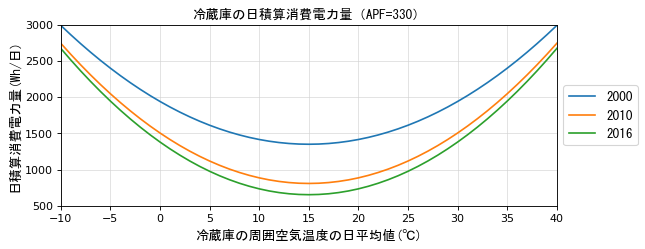

In [11]:
# 出力結果
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('冷蔵庫の日積算消費電力量（APF=330）', fontdict={'fontproperties':fp})

for i,year_mfr in enumerate([2000, 2010, 2016]):
    x_values =[x for x in range(-10, 45, 1)]
    y_values = [ EE_frige_d(330, year_mfr, theta_amb_ave) for theta_amb_ave in range(-10, 45, 1)]
    plt.plot(x_values, y_values, label=year_mfr)
        
ax=plt.gca()
ax.set_xlabel('冷蔵庫の周囲空気温度の日平均値(℃)', fontdict={'fontproperties':fp})
ax.set_xticks([x for x in range(-10, 50, 5)], minor=False)
ax.set_xbound(lower=-10, upper=40)

ax.set_ylabel('日積算消費電力量(Wh/日)', fontdict={'fontproperties':fp})
ax.set_yticks([y for y in range(500, 3100, 500)], minor=False)
ax.set_ybound(lower=500, upper=3000)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

除霜が機能することによる稼働時の平均消費電力$P_{opg,df}$は、式(12)により計算される

<p style="text-indent:2em">除霜が機能することによる稼働時の平均消費電力：</p>  
$$ 
\begin{equation*}
    P_{opg,df} = P_{rtd,heater} \times 0.9
\end{equation*}
$$

<div style="text-align: right;"> (12) </div>

ここで、  

$P_{opg,df}$：除霜が機能することによる稼働時の平均消費電力[W]  
$P_{rtd,heater}$：電熱器の定格消費電力[W]  

である。

In [12]:
def P_opg_df(Prtd_heater):
    '''除霜が機能することによる稼働時の平均消費電力[W]を計算する。'''
    # Prtd_heater：電熱器の定格消費電力[W]  
    
    return Prtd_heater * 0.9

### 2.4　標準条件

#### 2.4.1　機器仕様

4人世帯の標準的な機器仕様として、下表の設定を用いることができる。

| 番号 | 年間消費電力量[kWh/年] | 電熱器の定格消費電力[W] | 製造年 | 定格内容積[L] | 備考                        |  
|:----:| :--------------------: | :---------------------: | :----: | :-----------: | :-------------------------: |
|  00  | 200                    | 105                     | 2002年 | 400           |-                            |  
|  01  | 300                    | 150                     | 2009年 | 400           | 4人標準世帯（居間）の既定値 |  
|  02  | 220                    | 200                     | 2011年 | 400           |-                            |     

In [13]:
Spec  = {
    'Fridge00' : {
        'APF_JIS'     : 200,
        'Prtd_heater' : 105,
        'Year_mfr'    : 2002
    }, 
    'Fridge01' : {
        'APF_JIS'     : 300,
        'Prtd_heater' : 150,
        'Year_mfr'    : 2009
    },
    'Fridge02' : {
        'APF_JIS'     : 220,
        'Prtd_heater' : 200,
        'Year_mfr'    : 2011
    }
}

#### 2.4.2　機器動作スケジュール

4人世帯の標準的なスケジュールとして、下表の設定を用いることができる。

| 番号 | スケジュール名称  | 備考 |
|:---: | :---------------: | :--: |
|  00  | 4人標準世帯       | -    |

<p style="text-indent:2em">平日／休日在宅／休日外出：</p>  

|時刻                   |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                  | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|稼働時間_冷蔵[\* 60 s] |  0| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0|  
|稼働時間_除霜[\* 60 s] | 60|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 

In [14]:
# 機器動作スケジュール：4人標準世帯
Schedule = {
    '4p_standard' : {
        'Weekdays' : {
            'opg_rf' : [0]   *1 + [3600]*22 + [0]   *1,
            'opg_df' : [3600]*1 + [0]   *22 + [3600]*1
        },
        'Holidays_st' : {
            'opg_rf' : [0]   *1 + [3600]*22 + [0]   *1,
            'opg_df' : [3600]*1 + [0]   *22 + [3600]*1
        },
        'Holidays_go' : {
            'opg_rf' : [0]   *1 + [3600]*22 + [0]   *1,
            'opg_df' : [3600]*1 + [0]   *22 + [3600]*1
        }
    }
}

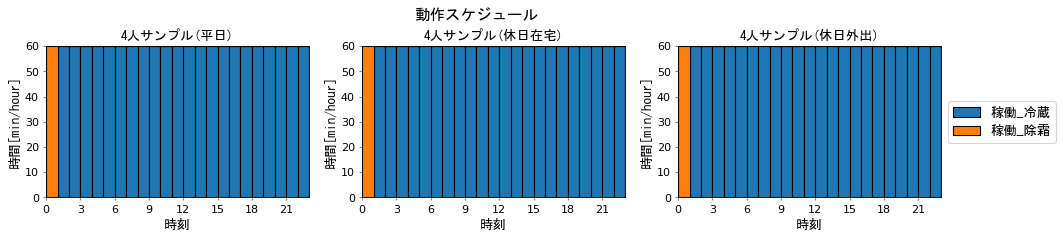

In [15]:
# 機器動作スケジュールの確認  
chart_title = '動作スケジュール'
schedule_name = ('4p_standard','4人サンプル' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg_rf','稼働_冷蔵'), ('opg_df','稼働_除霜') ]

y_value_sets = Schedule[schedule_name[0]] 


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = np.array(y_values[app_status_type[0]]) / 60
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 70, 10), minor=False)
    ax.set_ybound(lower=0, upper=60)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 2.5　冷蔵庫の周囲空気温度の日平均値

冷蔵庫の周囲空気温度が直接的にも求まらない場合、日平均外気温度および住宅の熱損失係数を用いて式(13)により推定した値を用いることができる。

<p style="text-indent:2em">暖房方式が居室間欠の場合：</p>   
$$ 
\begin{equation*}
    \displaystyle \theta_{amb,ave,d} = \left( 0.048 \times Q + 0.3666 \right) \times \theta_{ex,ave,d} + \left( -1.2435 \times Q + 18.82 \right)
\end{equation*}
$$
<div style="text-align: right;"> (13a) </div>
    
<p style="text-indent:2em">暖房方式が全館連続の場合：</p>  
$$ 
\begin{equation*}
    \displaystyle \theta_{amb,ave,d} = \left( 0.0604 \times Q + 0.3668 \right) \times \theta_{ex,ave,d} + \left( -1.6265 \times Q + 19.99 \right)
\end{equation*}
$$
<div style="text-align: right;"> (13b) </div>

ここで、  

$Q$：住宅の熱損失係数[W/m2]  
$\theta_{amb,ave,d}$：日付$d$における冷蔵庫の周囲空気温度の日平均値[℃]  
$\theta_{ex,ave,d}$：日付$d$における外気温の日平均値[℃]  


である。

In [16]:
class HeatingType(Enum):
    '''暖房方式'''
    # HabitableRoom：居室間欠
    # WholeHouse：全館連続

    HabitableRoom = 'habitable_room'
    WholeHouse = 'whole_house'

In [17]:
def get_theta_amb_ave(theta_ex_ave, Q_value, heating_type):
    '''冷蔵庫の周囲空気温度の日平均値[℃]を計算する'''
    # theta_ex_ave：外気温度の日平均値[C]
    # Q_value：住宅の熱損失係数[W/m2] 
    # heating_type：暖房方式[居室間欠、全館連続] 
    
    if heating_type == HeatingType.HabitableRoom:
        theta_amb_ave = (0.048 * Q_value + 0.3666) * theta_ex_ave + (-1.2435 * Q_value + 18.82)
    elif heating_type == HeatingType.WholeHouse:
        theta_amb_ave = (0.0604 * Q_value + 0.3668) * theta_ex_ave + (-1.6265 * Q_value + 19.99)
    else:
        try:
            raise Exception('暖房方式に不正があります。')
        except Exception:
            raise
    
    return theta_amb_ave

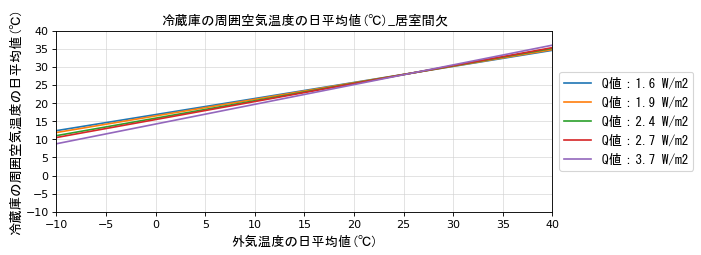

In [18]:
# 出力結果：居室間欠
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('冷蔵庫の周囲空気温度の日平均値(℃)_居室間欠', fontdict={'fontproperties':fp})

for i,Q_value in enumerate([1.6, 1.9, 2.4, 2.7, 3.7]):
    x_values = [x for x in range(-10, 45, 1)]
    y_values = [get_theta_amb_ave(theta_ex_ave, Q_value, HeatingType.HabitableRoom) for theta_ex_ave in x_values]
    plt.plot(x_values, y_values, label='Q値：'+str(Q_value)+' W/m2')
        
ax=plt.gca()
ax.set_xlabel('外気温度の日平均値(℃)', fontdict={'fontproperties':fp})
ax.set_xticks(np.arange(-10, 45, 5), minor=False)
ax.set_xbound(lower=-10, upper=40)

ax.set_ylabel('冷蔵庫の周囲空気温度の日平均値(℃)', fontdict={'fontproperties':fp})
ax.set_yticks(np.arange(-10, 45, 5), minor=False)
ax.set_ybound(lower=-10, upper=40)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

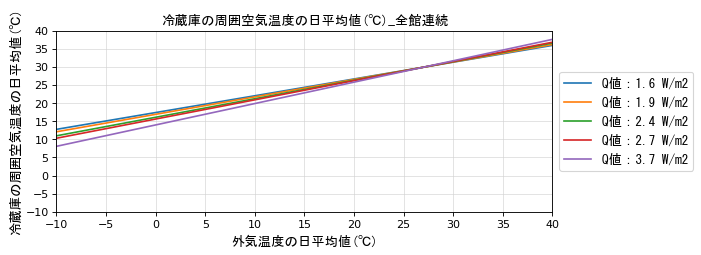

In [19]:
# 出力結果：全館連続
plt.figure(figsize = (8, 3), dpi=80 )
plt.subplot2grid((1, 1), (0, 0))
plt.title('冷蔵庫の周囲空気温度の日平均値(℃)_全館連続', fontdict={'fontproperties':fp})

for i,Q_value in enumerate([1.6, 1.9, 2.4, 2.7, 3.7]):
    x_values = [x for x in range(-10, 45, 1)]
    y_values = [get_theta_amb_ave(theta_ex_ave, Q_value, HeatingType.WholeHouse) for theta_ex_ave in x_values]
    plt.plot(x_values, y_values, label='Q値：'+str(Q_value)+' W/m2')
        
ax=plt.gca()
ax.set_xlabel('外気温度の日平均値(℃)', fontdict={'fontproperties':fp})
ax.set_xticks(np.arange(-10, 45, 5), minor=False)
ax.set_xbound(lower=-10, upper=40)

ax.set_ylabel('冷蔵庫の周囲空気温度の日平均値(℃)', fontdict={'fontproperties':fp})
ax.set_yticks(np.arange(-10, 45, 5), minor=False)
ax.set_ybound(lower=-10, upper=40)

ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')     
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True, prop=fp)

plt.show()

### 付録1：サンプルコード

4人標準世帯の標準条件について、サンプルコードを示す。

In [20]:
def get_spec(app_type):
    '''機器仕様を取得する'''
    # app_type：機器タイプ
    
    # 機器仕様の取得
    try:
        spec = Spec[app_type]
    except:
        raise Exception('機器タイプの入力に不正があります。')     
    
    APF_JIS = spec['APF_JIS']
    Prtd_heater = spec['Prtd_heater']
    year_mfr = spec['Year_mfr']
    
    return APF_JIS, Prtd_heater, year_mfr

Example:

In [21]:
ex_APF_JIS, ex_P_opg_df, ex_year_mfr = get_spec('Fridge01')
ex_APF_JIS, ex_P_opg_df, ex_year_mfr

(300, 150, 2009)

In [22]:
def get_dt(time_use_type, time_of_day, schedule_name):
    '''機器動作スケジュールを取得する'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23）
    # schedule_name：スケジュール名
     
    # スケジュールの取得
    try:
        schedule_set = Schedule[schedule_name][time_use_type]
    except:
        raise Exception('スケジュール名の入力に不正があります。')    
               
    # 動作状態のタイプ
    app_status_types = list(schedule_set)
    
    # 動作状態ごとの継続時間[s]の取得
    for i, app_status_type in enumerate(app_status_types):
        if app_status_type == 'opg_rf':
            dt_opg_rf = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'opg_df':
            dt_opg_df = schedule_set[app_status_type][time_of_day]
        else:
            raise Exception
            
    # 時間超過の確認
    check_duration([dt_opg_rf, dt_opg_df]) 
  
    return dt_opg_rf, dt_opg_df

Example:

In [23]:
ex_dt_opg_rf, ex_dt_opg_df = get_dt('Weekdays', 6, '4p_standard' )
ex_dt_opg_rf, ex_dt_opg_df

(3600, 0)

In [24]:
def calc_EE_opg(APF_JIS, P_opg_df, year_mfr, dt_opg_df, dt_opg_rf, theta_amb_ave):
    '''稼働時における消費電力量[Wh]を計算する'''
    
    # APF_JIS：JIS C 9801に基づく冷蔵庫の年間消費電力量[kWh/年]  
    # P_opg_df：除霜が機能することによる稼働時の平均消費電力[W]  
    # year_mfr：冷蔵の製造年[-]
    # dt_opg_df：除霜が機能することによる稼働時間の合計[s]
    # dt_opg_rf：冷蔵が機能することによる稼働時間の合計[s]
    # theta_amb_ave：冷蔵庫の周囲空気温度の日平均値[℃]  

    # 冷蔵が機能することによる稼働時の消費電力[W]
    p_opg_rf = P_opg_rf(APF_JIS, P_opg_df, year_mfr, theta_amb_ave)
    # 冷蔵が機能することによる稼働時の消費電力量[Wh]
    ee_opg_rf = EE_opg_rf(p_opg_rf, dt_opg_rf)
    
    # 除霜が機能することによる稼働時の消費電力量[Wh]
    ee_opg_df = EE_opg_df(P_opg_df, dt_opg_df)
    
    # 稼働時における消費電力量[Wh]
    ee_opg = EE_opg(ee_opg_rf, ee_opg_df)
    
    return  ee_opg

Example:

In [25]:
ex_theta_amb_ave = get_theta_amb_ave(20, 2.7, HeatingType.HabitableRoom)
ex_theta_amb_ave

25.38655

In [26]:
ex_EE_opg = calc_EE_opg(ex_APF_JIS, ex_P_opg_df, ex_year_mfr, ex_dt_opg_df, ex_dt_opg_rf, ex_theta_amb_ave)
ex_EE_opg 

37.46237324193075

In [27]:
def calc_EE_app(EE_opg):
    '''稼働時における消費電力量[Wh]を計算する'''
    # EE_opg：稼働時における消費電力量[Wh]
    
    return EE_app(EE_opg)

Example:

In [28]:
ex_EE_app = calc_EE_app(ex_EE_opg)
ex_EE_app

37.46237324193075

In [29]:
def calc_EE_Refrigerator_verP4(time_use_type, time_of_day, 
                             app_type, schedule_name, theta_ex_ave, Q_value, heating_type):
    '''冷蔵庫の単位時間当たりの消費電力量を計算する（ver自立P4）'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23） 
    # app_type：機器タイプ  
    # schedule_name：スケジュール名 ['4p_standard']
    # theta_ex_ave：外気温度の日平均値[C]
    # Q_value：住宅の熱損失係数[W/m2] 
    # heating_type：暖房方式[居室間欠、全館連続] 
    
    # 機器動作スケジュール[s]を取得
    dt_opg_rf, dt_opg_df = get_dt(time_use_type, time_of_day, schedule_name)
    
    # 機器仕様を取得
    APF_JIS, P_opg_df, year_mfr = get_spec(app_type)
    
    # 冷蔵庫の周囲空気温度の日平均値[C]を取得
    theta_amb_ave = get_theta_amb_ave(theta_ex_ave, Q_value, heating_type)
    
    # 稼働時における消費電力量[Wh]を計算
    EE_opg = calc_EE_opg(APF_JIS, P_opg_df, year_mfr, dt_opg_df, dt_opg_rf, theta_amb_ave)
    
    # 消費電力量[Wh]を計算
    EE_app = calc_EE_app (EE_opg)
    
    return EE_app, EE_opg

In [30]:
ex_EE_Refrigerator = calc_EE_Refrigerator_verP4('Weekdays', 6, 
                             'Fridge01', '4p_standard', 20, 2.7, HeatingType.HabitableRoom)
ex_EE_Refrigerator

(37.46237324193075, 37.46237324193075)

### 付録2：サンプルコードによる時刻別消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより平日、休日在宅、休日外出の時刻別消費電力量を計算した結果を示す。

In [31]:
# 消費電力量の計算
# 入力
time_use_type = [['Weekdays'], ['Holidays_st'], ['Holidays_go']]
time_of_day = [i for i in range(0, 24, 1)]
app_type = 'Fridge01'
schedule_name = '4p_standard'
theta_ex_ave = 20
Q_value  = 2.7
heating_type = HeatingType.HabitableRoom

# 消費電力量の計算
ee_app, ee_opg = np.vectorize(calc_EE_Refrigerator_verP4)(time_use_type, time_of_day,
                                                 app_type, schedule_name,
                                                 theta_ex_ave, Q_value, heating_type)

# 消費電力量の計算結果
EE_Results= {
    'Weekdays' : {
        'opg' : ee_opg[0],
    },
    'Holidays_st' : {
        'opg' : ee_opg[1],
    },
    'Holidays_go' : {
        'opg' : ee_opg[2],
        }
    }

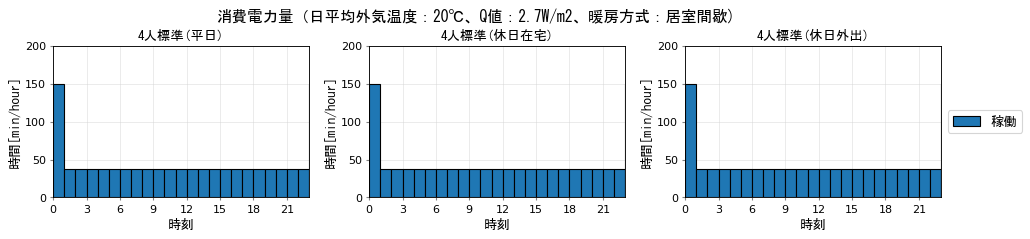

In [32]:
# 消費電力量の計算結果のグラフ 
chart_title = '消費電力量（' \
                + '日平均外気温度：' + str(theta_ex_ave) + '℃、'\
                + 'Q値：' + str(Q_value) + 'W/m2、'\
                + '暖房方式：' + {HeatingType.HabitableRoom:'居室間歇', HeatingType.WholeHouse:'全館連続'} [heating_type] \
                + ')'
schedule_name = ('4p_standard','4人標準' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働') ]

y_value_sets = EE_Results


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 300, 50), minor=False)
    ax.set_ybound(lower=0, upper=200)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録3：サンプルコードによる年間消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより年間消費電力量を計算した結果を示す。

In [33]:
def calc_annual_EE_app(app_type, schedule_name,
                   theta_ex_ave, Q_value, heating_type):
    '''年間消費電力量[Wh/year]を計算する'''
    # app_type：機器タイプ  
    # schedule_name：スケジュール名 ['4p_standard']
    # theta_ex_ave：外気温度の日平均値[C]
    # Q_value：住宅の熱損失係数[W/m2] (List型)
    # heating_type：暖房方式[居室間欠、全館連続] 

    def calc_daily_EE_app(schedule, app_type, schedule_name, 
                         theta_ex_ave, Q_value, heating_type):
        '''1日あたりの消費電力量[Wh/day]を計算する'''
        hourly_EE_app = [ calc_EE_Refrigerator_verP4(schedule, t, 
                                                    app_type, schedule_name, 
                                                    theta_ex_ave, Q_value, heating_type)[1] for t in range(0, 24, 1) ]
        return sum( hourly_EE_app )
    
    daily_EE_app = [ calc_daily_EE_app(schedule, 
                                     app_type, schedule_name, 
                                     theta_ex_ave[i], Q_value, heating_type) for i, schedule in  enumerate(get_calendar()) ]
    return sum( daily_EE_app )

In [34]:
# 年間消費電力量[kWh/year]：6地域
ex_annual_EE_app = calc_annual_EE_app('Fridge01', '4p_standard', 
                              calc_theta_ex_ave('region6'), get_Q_value('region6'), 
                              HeatingType.HabitableRoom)
print('年間消費電力量：' + str(ex_annual_EE_app/1000) + ' kWh/年')

年間消費電力量：385.6885535489002 kWh/年
